In [1]:
#import of modules
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [50]:
# Kruskal algorithm
from collections import defaultdict
 
# Class to represent a graph
 
 
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = []  # default dictionary
        # to store graph
 
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    # A utility function to find set of an element i
    # (uses path compression technique)
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
 
    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
 
        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
 
        # If ranks are same, then make one as root
        # and increment its rank by one
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
 
    # The main function to construct MST using Kruskal's
        # algorithm
    def KruskalMST(self):
 
        result = []  # This will store the resultant MST
         
        # An index variable, used for sorted edges
        i = 0
         
        # An index variable, used for result[]
        e = 0
 
        # Step 1:  Sort all the edges in
        # non-decreasing order of their
        # weight.  If we are not allowed to change the
        # given graph, we can create a copy of graph
        self.graph = sorted(self.graph,
                            key=lambda item: item[2])
 
        parent = []
        rank = []
 
        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:
 
            # Step 2: Pick the smallest edge and increment
            # the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            # If including this edge does't
            #  cause cycle, include it in result
            #  and increment the indexof result
            # for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            # Else discard the edge
 
        minimumCost = 0
        for u, v, weight in result:
            minimumCost += weight

In [170]:
#Test sample
adj_list=dict()
adj_list={'v0':['v1','v2','v3','v4','v5','v6'],'v1':['v0','v2'],'v2':['v0','v1'],'v3':['v0','v4'],'v4':['v0','v3'],'v5':['v0','v6'],'v6':['v0','v5']}
weights=[('v0','v1',7),('v0','v2',9),('v0','v3',5),('v0','v4',10),('v0','v5',3),('v0','v6',5),('v1','v2',1),('v3','v4',14),('v5','v6',6)]

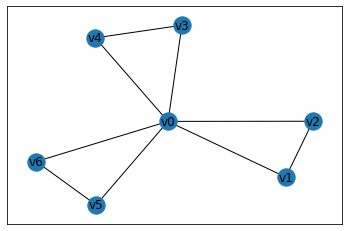

In [172]:
#Test graph visualization
G=nx.Graph()
for key in adj_list.keys():
    G.add_node(key)
for key in adj_list.keys():
    for j in range(len(adj_list[key])):
        G.add_edge(key,adj_list[key][j])
nx.draw_networkx(G)

In [175]:
#Testing Kruskal's algorithm correctness 
g=Graph(7)
g.addEdge(0,1,7)
g.addEdge(0,2,9)
g.addEdge(0,3,5)
g.addEdge(0,4,10)
g.addEdge(0,5,3)
g.addEdge(0,6,5)
g.addEdge(1,2,1)
g.addEdge(3,4,14)
g.addEdge(5,6,6)
g.KruskalMST()

Edges in the constructed MST
1 -- 2 == 1
0 -- 5 == 3
0 -- 3 == 5
0 -- 6 == 5
0 -- 1 == 7
0 -- 4 == 10
Minimum Spanning Tree 31


In [64]:
#Time performance of the Kruskal's algorithm given number of vertices
final_list=[]
for i in range(500):
    #graph generation with constant number of nodes
    N = 200
    E = i
    g=Graph(N)
    for p in range(E):
        num=np.random.randint(1,N)
        g.addEdge(num,np.random.randint(0,num),np.random.randint(1,100))
    for p in range(N):
        g.addEdge(p,1,1000000)
    #time measurements 
    summa=0
    for k in range(10):
        start_time=time.time()
        g.KruskalMST()
        end_time=time.time()
        summa=summa+end_time-start_time
    final_list.append(summa/10)

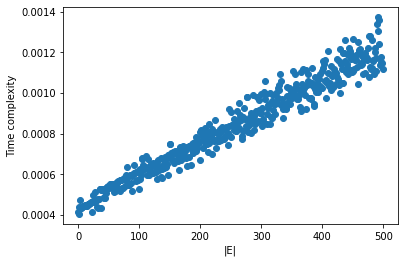

In [79]:
#Time complexity visualization for changing |E|
x=np.array([i for i in range(0,500)])
plt.xlabel('|E|')
plt.ylabel('Time complexity')
plt.scatter(x,final_list)

In [67]:
#Time performance of the Kruskal's algorithm given number of edges
final_list_vertex=[]
for i in range(500):
    #graph generation with constant number of nodes
    N = 50+i
    E = 1000
    k = 0
    matr = np.random.random_integers(0,0,size=(N,N))
    for i_mat in range(N):
        for j_mat in range(N):
            if j_mat>i_mat:
                if k<E:
                    matr[i_mat][j_mat]=np.random.random_integers(1,100)
                    if matr[i_mat][j_mat]!=0:
                        k=k+1
            elif j_mat==i_mat:
                matr[i_mat][j_mat]=0
            else:
                matr[i_mat][j_mat]=matr[j_mat][i_mat]
    print(i)
    g=Graph(N)
    for i_g in range(N):
        for j_g in range(N):
            if j_g>i_g and matr[i_g][j_g]!=0:
                g.addEdge(i_g,j_g,matr[i_g][j_g])
    #time measurements 
    summa=0
    for k in range(10):
        start_time=time.time()
        g.KruskalMST()
        end_time=time.time()
        summa=summa+end_time-start_time
    final_list_vertex.append(summa/10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<ipython-input-67-666799b7f0bf>:7: DeprecationWarning: This function is deprecated. Please call randint(0, 0 + 1) instead
  matr = np.random.random_integers(0,0,size=(N,N))
<ipython-input-67-666799b7f0bf>:12: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  matr[i_mat][j_mat]=np.random.random_integers(1,100)


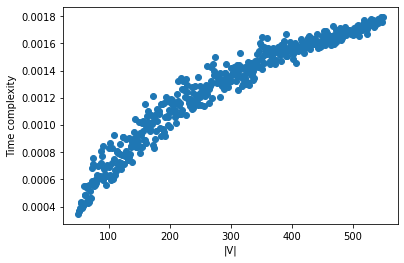

In [80]:
#Visualization of empirical time complexity for changing |V|
x=np.array([i for i in range(50,550)])
plt.xlabel('|V|')
plt.ylabel('Time complexity')
plt.scatter(x,final_list_vertex)

In [34]:
#second task: cutting rod problem
#simple top-down recursion
def cutrod(p,n):
    if n==0:
        return 0
    q=-np.Infinity
    for i in range(1,n+1):
        q=max(q,p[i]+cutrod(p,n-i))
    return q

In [23]:
#top-down recursion with memoization
def mem_cut_rod_aux(p,n,r):
    if r[n-1]>=0:
        return r[n-1]
    if n==0:
        q=0
    else:
        q=-np.inf
        for i in range(1,n+1):
            q=max(q,p[i]+mem_cut_rod_aux(p,n-i,r))
    r[n-1]=q
    return q
def mem_cut_rod(p,n):
    r=[]
    for i in range(n):
        r.append(-np.inf)
    return mem_cut_rod_aux(p,n,r)

In [75]:
#Test sample and correctness proof
p=[0,1,5,8,9,10,17,17,20,24,30]
n=5
print('n =',n,'max revenue=',mem_cut_rod(p,n))
print('n =',n,'max revenue=',cutrod(p,n))

n = 5 max revenue= 13
n = 5 max revenue= 13


In [44]:
#Time performance of the simple top-down recursive algorithm
final_cut_rod=[]
for i in range(22):
    n=i
    p=[0]
    for j in range(n):
        p.append(np.random.randint(0,50))
    summa=0
    for k in range(10):
        start_time=time.time()
        cutrod(p,n)
        end_time=time.time()
        summa=summa+end_time-start_time
    final_cut_rod.append(summa/10)

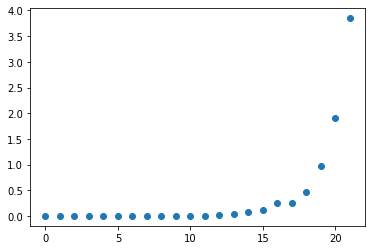

In [46]:
#Visualization of empirical time complexity for the algorithm above
x=np.array([i for i in range(0,22)])
plt.scatter(x,final_cut_rod)

In [77]:
#Time performance of the top-down recursive algorithm with memoization
final_cut_rod_mem=[]
for i in range(1,101):
    n=i
    p=[0]
    for j in range(n):
        p.append(np.random.randint(0,50))
    summa=0
    for k in range(10):
        start_time=time.time()
        mem_cut_rod(p,n)
        end_time=time.time()
        summa=summa+end_time-start_time
    final_cut_rod_mem.append(summa/10)

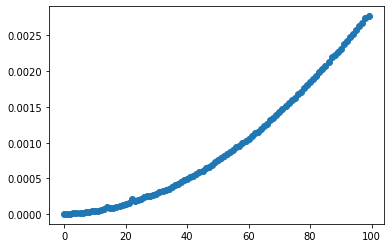

In [78]:
#Visualization of empirical time complexity for the algorithm above
x=np.array([i for i in range(0,100)])
plt.scatter(x,final_cut_rod_mem)